# Exploratory Data Analysis

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Loading the data
file_path = file_path = 'C:/Users/gaurav/Downloads/Documents/Machine Learning-Project/Data.xlsx'
data = pd.read_excel(file_path, header=0)

In [7]:
# 1. Summary of the dataset
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isna().sum())
print("\nStatistical Summary:\n", data.describe())

Dataset Shape: (4380, 8)

Data Types:
 Agitation                   int64
Batch ID                   object
Operation                  object
Phase                      object
Product                    object
Reactor Temperature       float64
Solution Concentration    float64
Volume                    float64
dtype: object

Missing Values:
 Agitation                 0
Batch ID                  0
Operation                 0
Phase                     0
Product                   0
Reactor Temperature       0
Solution Concentration    0
Volume                    0
dtype: int64

Statistical Summary:
          Agitation  Reactor Temperature  Solution Concentration       Volume
count  4380.000000          4380.000000             4380.000000  4380.000000
mean     73.321918            25.867849                8.390338  2154.654925
std      26.879736            15.448724                8.698400  1001.110380
min       0.000000             9.800000                0.000000    11.000000
25%      75.

In [31]:
# 2. Handling datetime feature
data['Date-Time'] = pd.to_datetime(data['Date-Time'])
data.set_index('Date-Time', inplace=True)

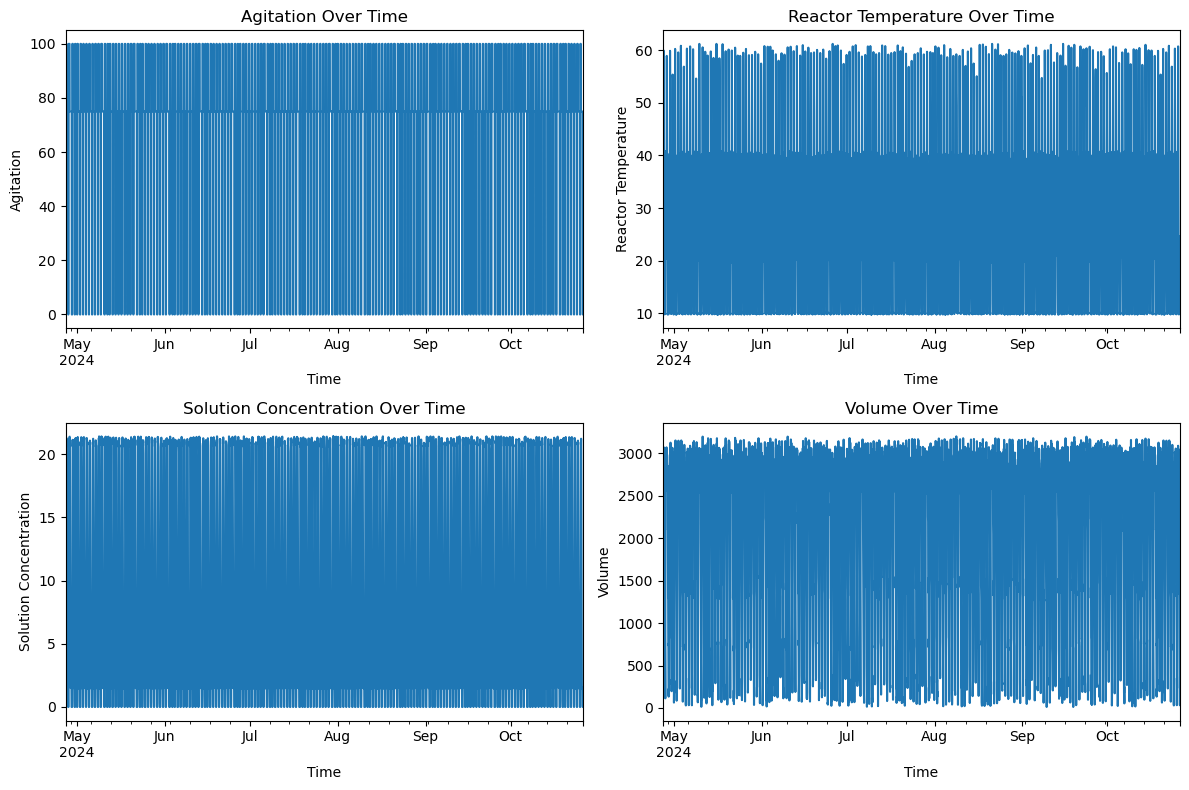

In [37]:
# 3. Visualize trends over time for continuous variables
continuous_vars = ['Agitation', 'Reactor Temperature', 'Solution Concentration', 'Volume']

plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    data[var].plot()
    plt.title(f"{var} Over Time")
    plt.xlabel("Time")
    plt.ylabel(var)
plt.tight_layout()
plt.show()

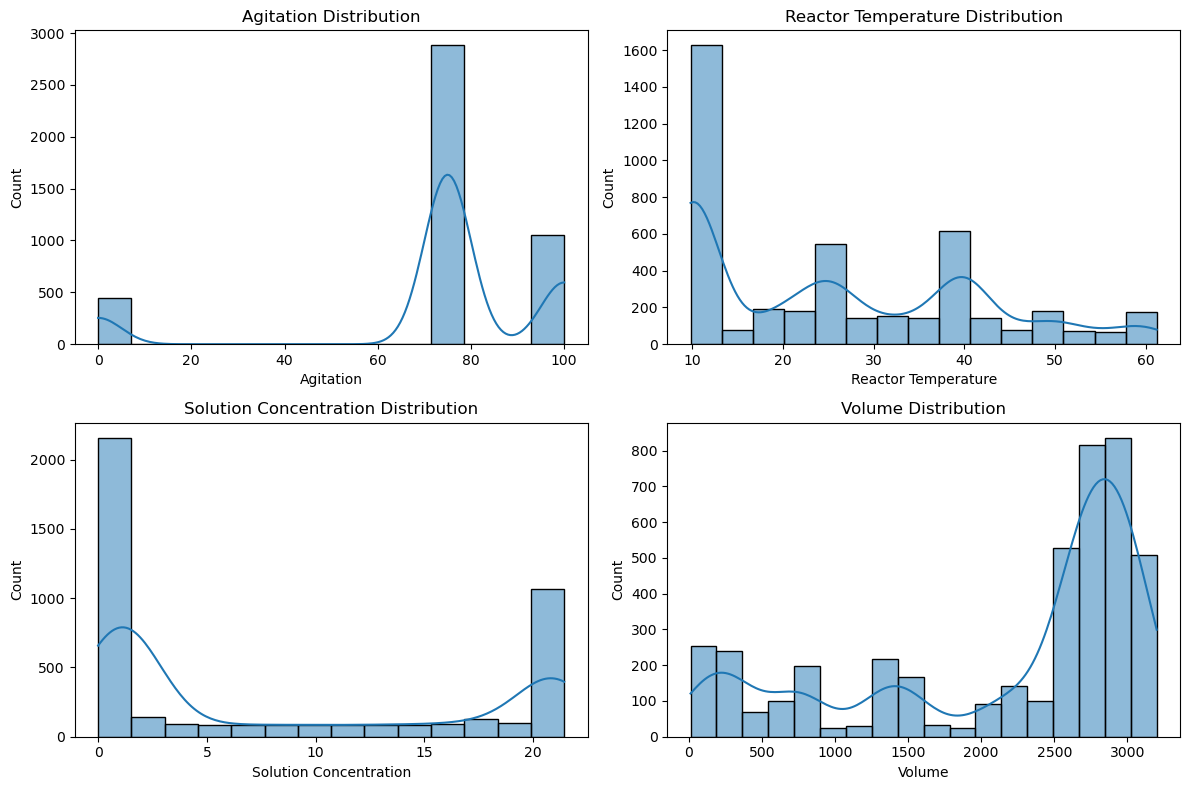

In [39]:
# 4. Distribution plots for continuous variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], kde=True)
    plt.title(f"{var} Distribution")
plt.tight_layout()
plt.show()

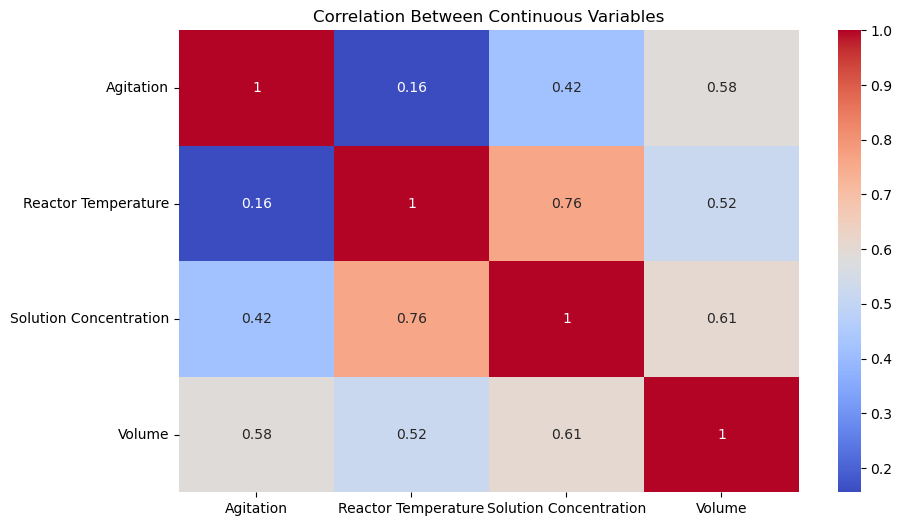

In [41]:
# 5. Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data[continuous_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Continuous Variables")
plt.show()

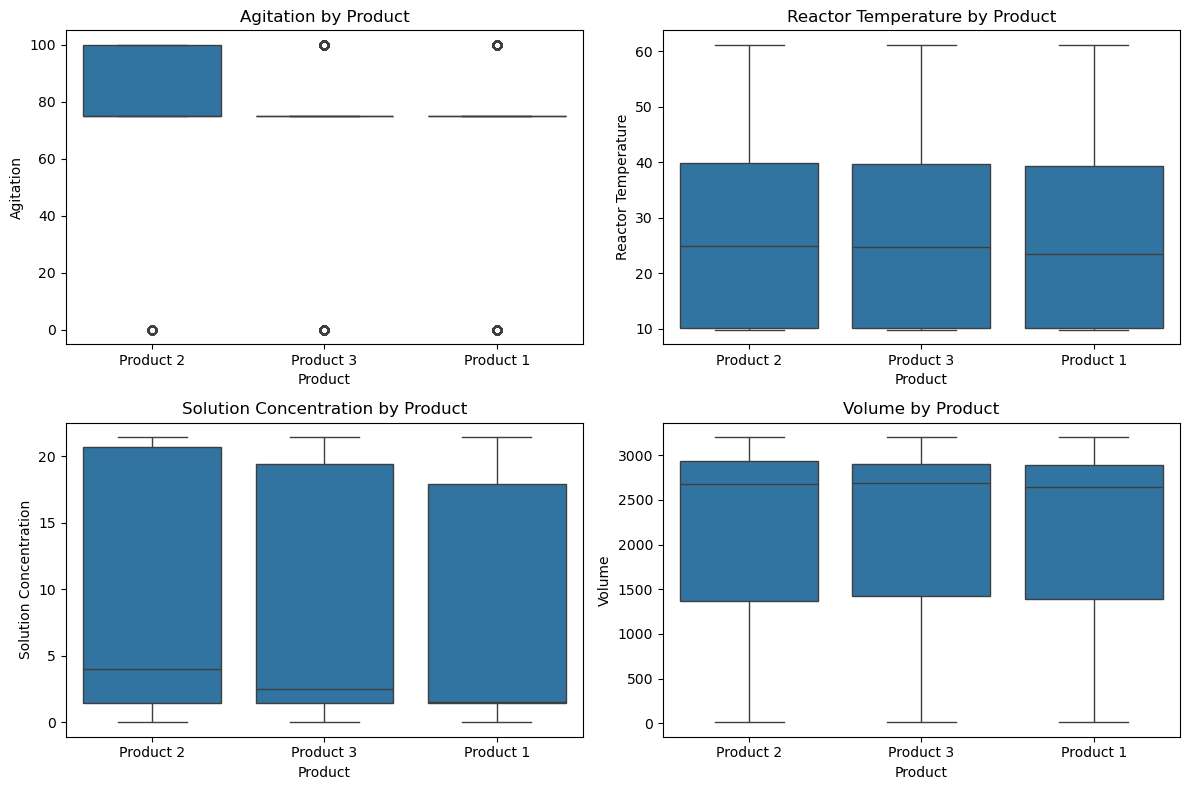

In [43]:
# 6. Box plots to detect outliers for each continuous variable by 'Product'
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Product', y=var, data=data)
    plt.title(f"{var} by Product")
plt.tight_layout()
plt.show()

In [45]:
# 7. Grouping by 'Batch ID' and 'Operation' for average analysis of variables
grouped_data = data.groupby(['Batch ID', 'Operation'])[continuous_vars].mean()
print("\nGrouped Data by Batch ID and Operation:\n", grouped_data)


Grouped Data by Batch ID and Operation:
                           Agitation  Reactor Temperature  \
Batch ID    Operation                                      
Batch R1-01 Operation 1    0.000000            24.925000   
            Operation 2  100.000000            33.590314   
            Operation 3   75.000000            33.773363   
            Operation 4   75.000000             9.994190   
            Operation 5    3.409091            22.024045   
Batch R1-02 Operation 1    0.000000            25.005556   
            Operation 2   99.687500            32.223013   
            Operation 3   75.000000            34.675823   
            Operation 4   75.000000             9.987386   
            Operation 5    0.000000            21.891167   
Batch R1-03 Operation 1    0.000000            25.059375   
            Operation 2   99.702381            33.417958   
            Operation 3   75.000000            35.258667   
            Operation 4   75.000000            10.006184  